### IMPORTS

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import imblearn as imb

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Some functions
from utils import *

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Split Data to Train & Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

##### Method 2: SVM

##### A-Simple Model

In [ ]:
#################################################### Model Training ####################################################
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

Training Accuracy: 0.8577538631346578
Testing Accuracy: 0.8600993377483444
Confusion Matrix: 
 [[42994   745]
 [ 6353   644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     43739
           1       0.46      0.09      0.15      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736



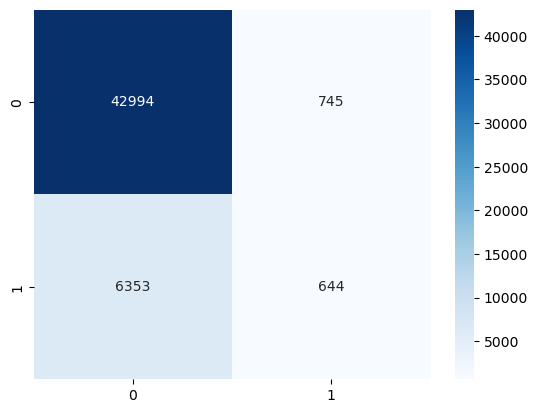

AUC: 0.815


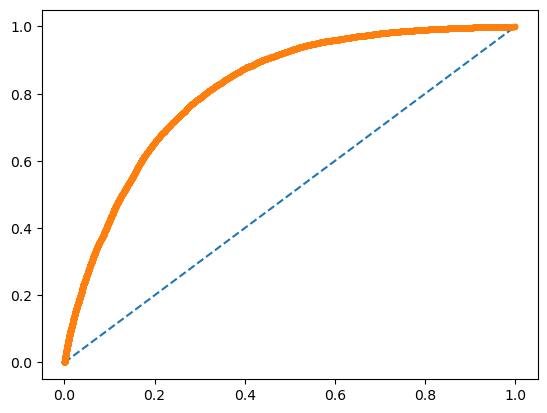

In [ ]:
#################################################### Model Evaluation ####################################################
# Evaluate model
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

#ROC-AUC Curve
# predict probabilities and keep postive outcomes only
# Calibrate the model by training on a validation set using cross-validation to get probability estimates by "sigmoid" (Platt scaling) or "isotonic regression".
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(svm_model)  
calibrated_svc.fit(X_train, y_train)
probs = calibrated_svc.predict_proba(X_test)
probs = probs[:, 1]

# AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()


In [ ]:
# svm = SVC(gamma='auto', kernel='linear', C=1.0, random_state=0)
# svm.fit(X_train, y_train)


SVC(gamma='auto', kernel='linear', random_state=0)

In [ ]:
# #################################################### Model Evaluation ####################################################
# # Evaluate model
# train_accuracy = accuracy_score(y_train, svm.predict(X_train))
# test_accuracy = accuracy_score(y_test, svm.predict(X_test))

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8603112188584043
Testing Accuracy: 0.8620900346893724


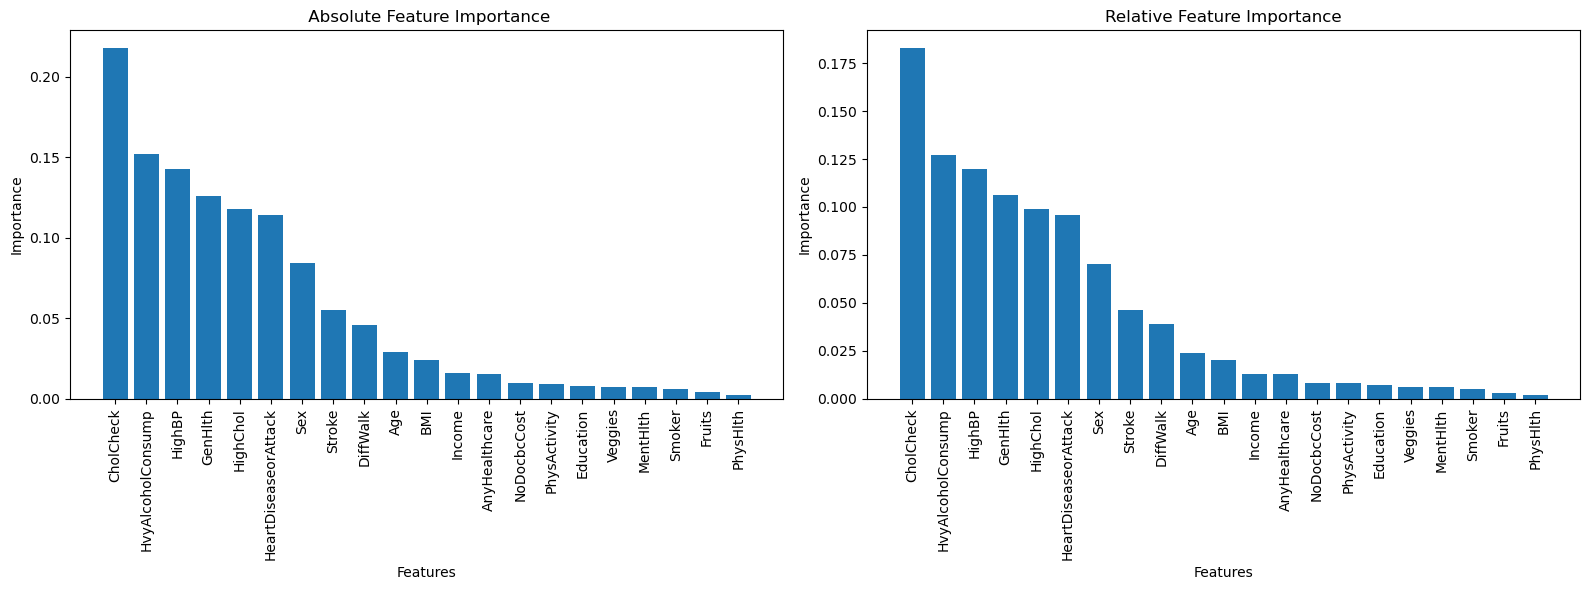

In [ ]:
#################################################### Feature's Importance ####################################################
#1-Absolute Feature Importance
feature_importance = {}
for idx, feature_name in enumerate(features):
	importance = abs(svm_model.coef_[0][idx]).round(3)  # Get the absolute value of the coefficient
	feature_importance[feature_name] = importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importances
features_plot_x = list(sorted_feature_importance.keys())
importances_plot_y = list(sorted_feature_importance.values())

plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 1) 
plt.bar(features_plot_x, importances_plot_y)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(' Absolute Feature Importance')

#2-Relative Feature Importance
# Calculate total importance
total_importance = sum(importances_plot_y)
relative_importances = [(importance / total_importance).round(3) for importance in importances_plot_y]

plt.subplot(1, 2, 2)
plt.bar(features_plot_x, relative_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Relative Feature Importance')

plt.tight_layout() 
plt.show()

# print("Feature Importance (Absolute): ", relative_importances)

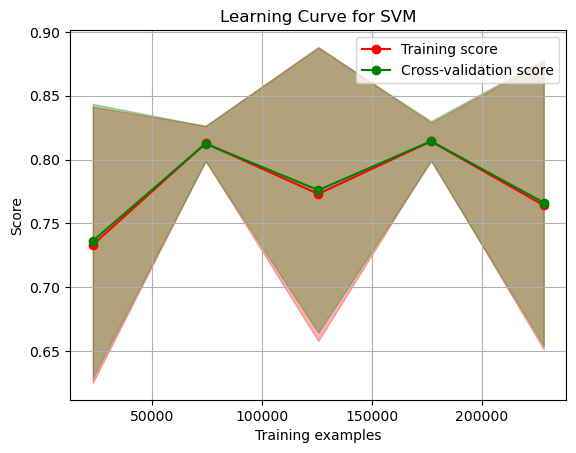

In [ ]:
# Get the learning curve plot
train_sizes, train_scores, test_scores = learning_curve(svm_model, features, labels, cv=10,
                                                            train_sizes=np.linspace(.1, 1.0, 5),
                                                            scoring='f1_weighted', shuffle=True, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
					train_scores_mean + train_scores_std, alpha=0.3, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
					test_scores_mean + test_scores_std, alpha=0.3, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
			label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
			label="Cross-validation score")

plt.legend(loc='best')
plt.show()

ValueError: cannot reshape array of size 1 into shape (2)

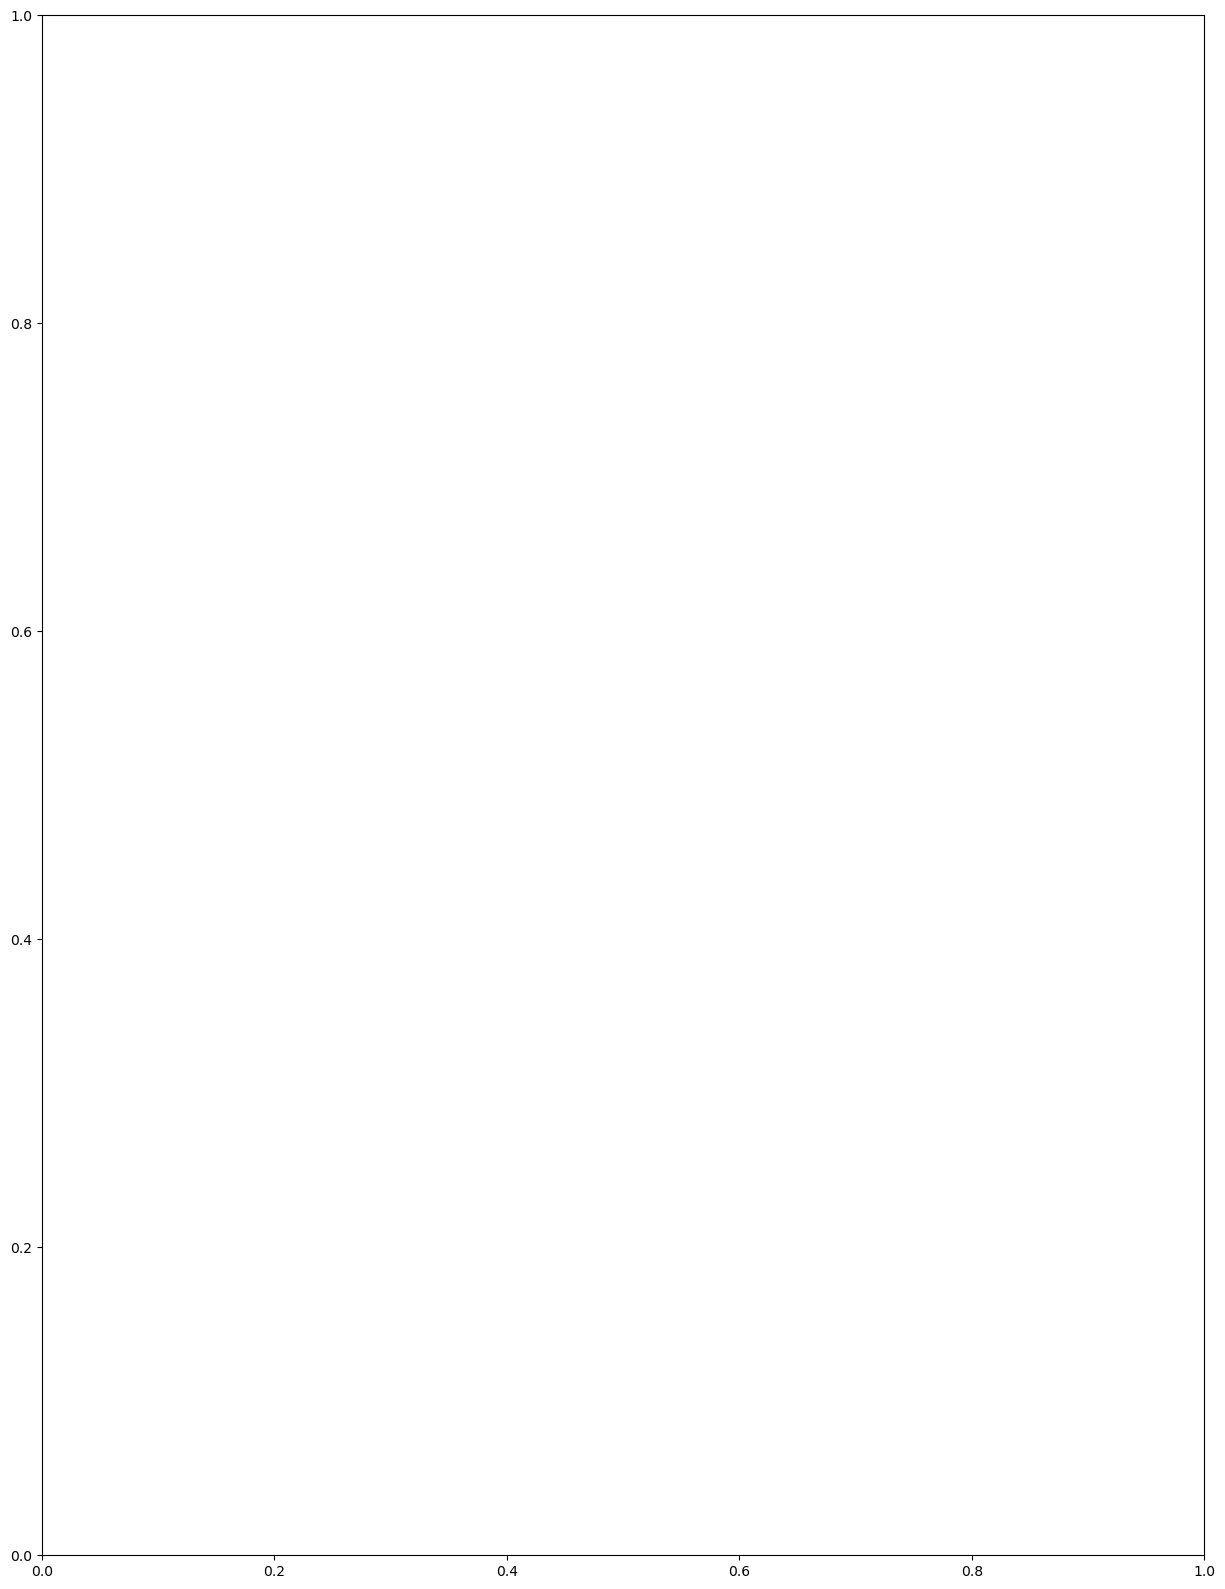

In [ ]:
# # Model's Features Dependencies
# '''
# This is to show the relationship between a feature and the model's predictions (with all other features constant)

# '''
# from sklearn.inspection import PartialDependenceDisplay
# fig, ax = plt.subplots(figsize=(15, 20), )
# target_class = 0  # specify the target class
# PartialDependenceDisplay.from_estimator(
# 	svm_model, features, features.columns, ax=ax, target=target_class)

# # Increase spacing between subplots
# fig.subplots_adjust(wspace=0.3, hspace=0.3)
# fig.suptitle(f'Partial Dependence Plots for SVM (Target Class: {target_class})')
# fig.tight_layout()
# plt.show()


##### B-Tuned Model

In [ ]:
#################################################### Hyper Parameter Tuning ####################################################
'''
C: Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error. Higher values of C lead to a smaller margin and potentially more misclassifications on the training data.
kernel: Specifies the kernel type to be used in the algorithm. It can be one of {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}. The default is 'rbf' (Radial Basis Function).
degree: Degree of the polynomial kernel function ('poly'). This parameter is ignored for other kernel types.
gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. Higher values of gamma lead to tighter decision boundaries, potentially resulting in overfitting.
coef0: Independent term in the polynomial and sigmoid kernels. It is only significant in 'poly' and 'sigmoid' kernels.
shrinking: Whether to use the shrinking heuristic. Shrinking helps speed up the optimization process, especially for large datasets. It's enabled by default.
probability: Whether to enable probability estimates. This allows the predict_proba method to be used, but it adds computational overhead. Disabled by default.
tol: Tolerance for stopping criterion.
cache_size: Size of the kernel cache in MB.
class_weight: Weights associated with classes. This parameter is particularly useful for imbalanced datasets.
verbose: Controls the verbosity of the SVC algorithm.
max_iter: Maximum number of iterations for the solver to converge. The default is -1, which means no limit.
'''